# PCA from Scratch for Life Satisfaction Prediction with Better Life Index Data

In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv('BLI.CSV',encoding=' ISO-8859-1')
df.head()

,Country,Dwellings without basic facilities,Housing expenditure,Rooms per person,disposable income,household net wealth,labour market insecurity,employment rate,unemployment rate,personal earnings,...,water quality,stakeholder engagement,voter turnout,life expectancy,self reported health,life satisfaction,feeling safe,homicide rate,working hours,personal time
0,Australia,NaN,19.4,NaN,37433.0,528768.0,3.1,73,1.0,55206.0,...,92,2.7,92,83.0,85.0,7.1,67,0.9,12.5,14.36
1,Austria,0.8,20.8,1.6,37001.0,309637.0,2.3,72,1.3,53132.0,...,92,1.3,76,82.0,71.0,7.2,86,0.5,5.3,14.51
2,Belgium,0.7,20.0,2.1,34884.0,447607.0,2.4,65,2.3,54327.0,...,79,2.0,88,82.1,74.0,6.8,56,1.1,4.3,15.52
3,Canada,0.2,22.9,2.6,34421.0,478240.0,3.8,70,0.5,55342.0,...,90,2.9,68,82.1,89.0,7.0,78,1.2,3.3,14.57
4,Chile,9.4,18.4,1.9,NaN,135787.0,7.0,56,NaN,26729.0,...,62,1.3,47,80.6,60.0,6.2,41,2.4,7.7,NaN


# About the Data -
The data is sourced from the OECD (Organisation for Economic- Cooperation and Development). They are an organisation of mainly 38 countries and they collect data on a range of variables from general indicators like the GDP to even specific ones like
households with a broadband connection.<br>
This dataset specifically is the BETTER LIFE INDEX dataset, which is a way to measure the well-being of countries, using 11 dimensions, each with different indicators, it covers both qualitative and quantitative aspects as we can see above, we have taken all the indicators of the dataset.The Better Life Index was made to overcome the limitations of GDP in assessing the qualitative aspects of well-being and hence, impacting policy making. Since, the policies will only be made for things which are being measured and analysed.<br>
**Let's do dimensionality reduction for the housing dimension and the environment dimension.**

# EDA

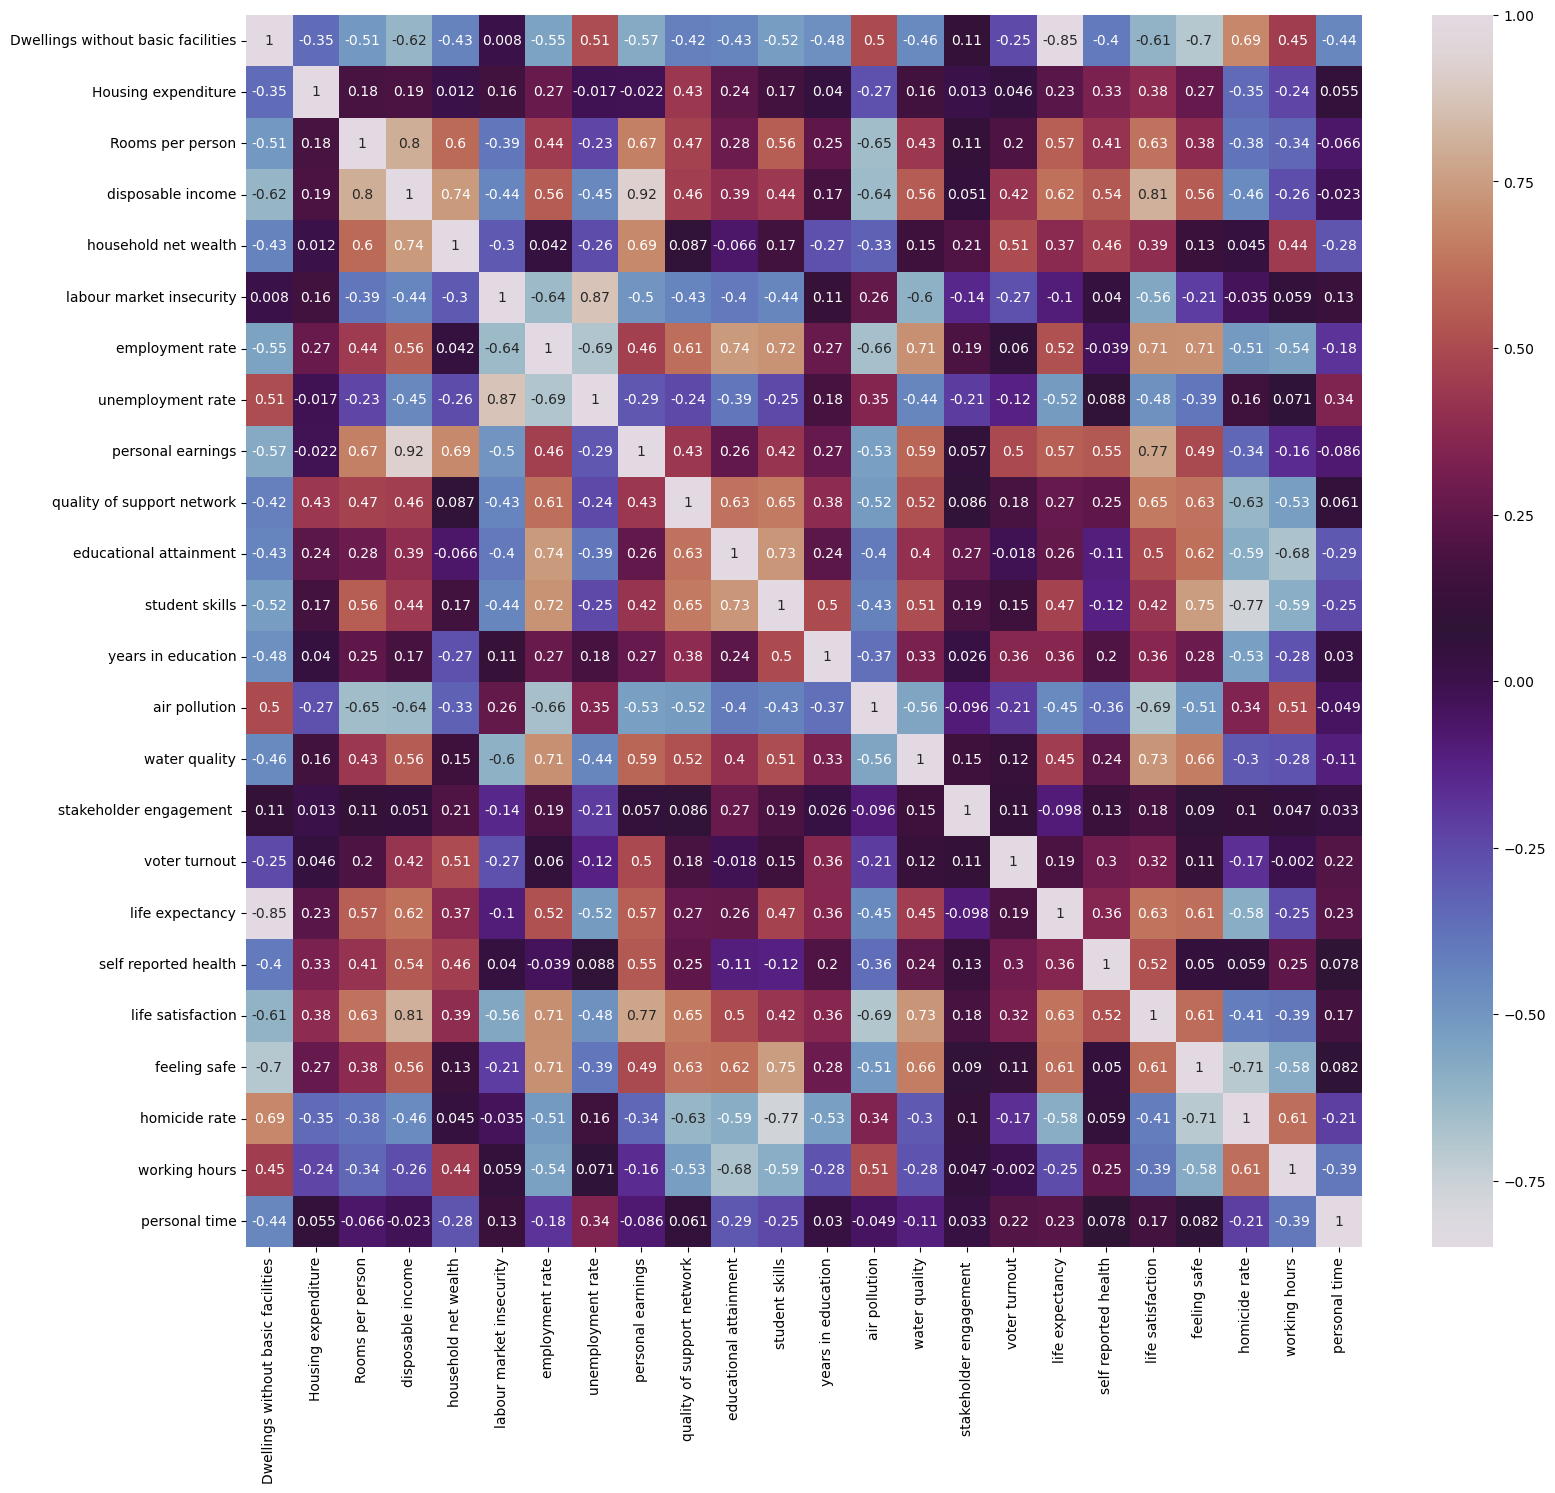

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18, 16))
sns.heatmap(df.corr(),annot=True,cmap='twilight')
plt.show()

Housing Dimension has three variable: <br>
1. Dwellings without basic facilities
2. Housing expenditure
3. Rooms per person <br>

Environment Dimension has two variables: <br>
1. air pollution
2. water quality

In [3]:
life=df[['Country','Dwellings without basic facilities','Rooms per person','Housing expenditure','air pollution','water quality','life satisfaction']]
life.head()

,Country,Dwellings without basic facilities,Rooms per person,Housing expenditure,air pollution,water quality,life satisfaction
0,Australia,NaN,NaN,19.4,6.7,92,7.1
1,Austria,0.8,1.6,20.8,12.2,92,7.2
2,Belgium,0.7,2.1,20.0,12.8,79,6.8
3,Canada,0.2,2.6,22.9,7.1,90,7.0
4,Chile,9.4,1.9,18.4,23.4,62,6.2


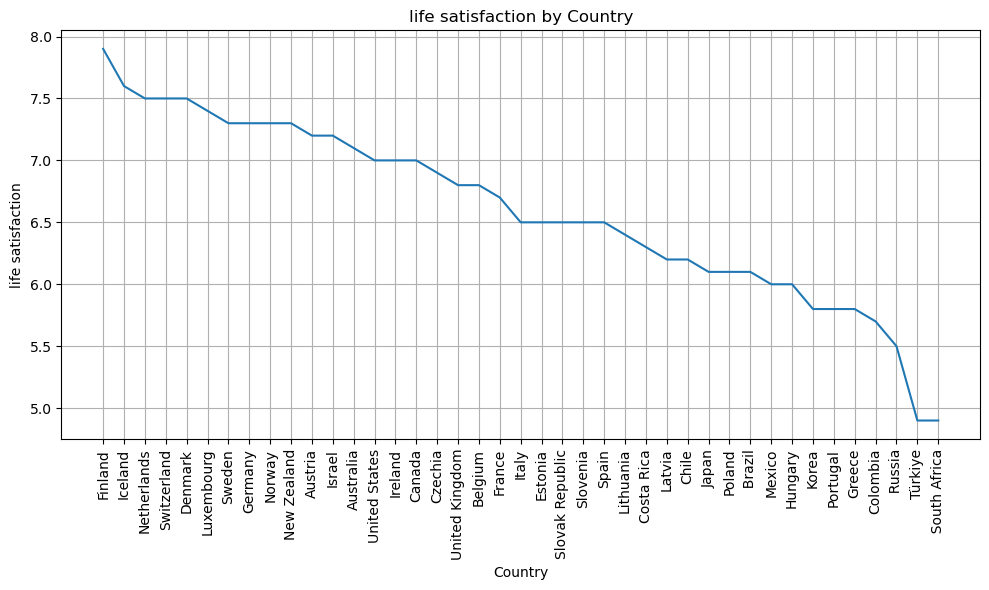

In [4]:
sorted_country = life.sort_values(by='life satisfaction', ascending=False)
plt.figure(figsize=(10, 6))
plt.plot(sorted_country['Country'], sorted_country['life satisfaction'],)
plt.title('life satisfaction by Country')
plt.xlabel('Country')
plt.ylabel('life satisfaction')
plt.xticks(rotation=90)  
plt.grid(True)
plt.tight_layout()
plt.show()

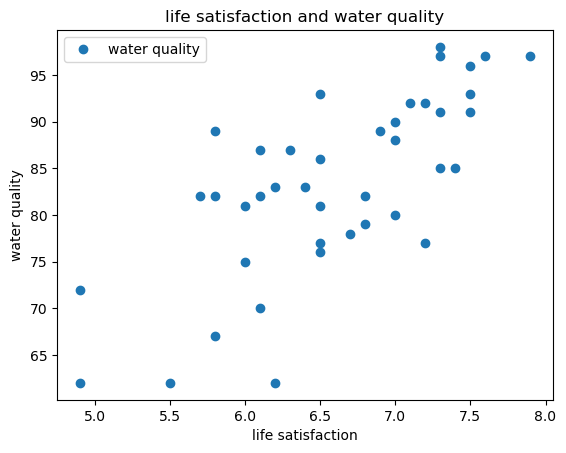

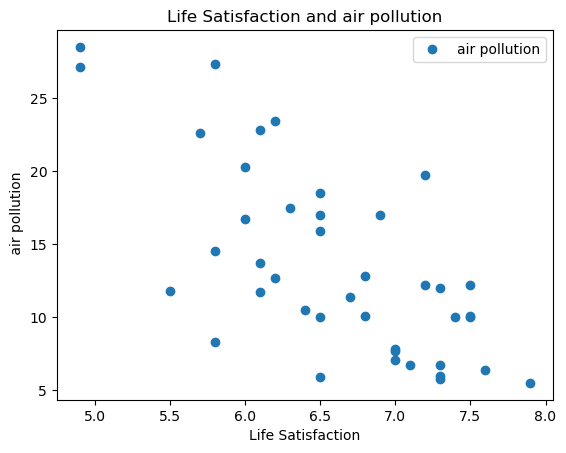

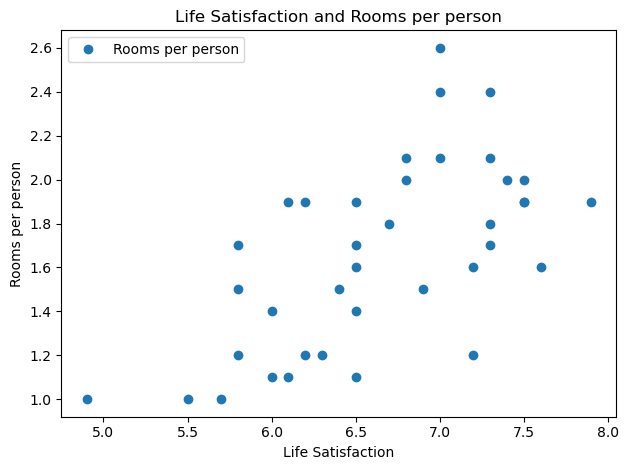

In [5]:
life.plot(x='life satisfaction',y='water quality',style='o')
plt.title('life satisfaction and water quality')
plt.xlabel('life satisfaction')
plt.ylabel('water quality')

life.plot(x='life satisfaction',y='air pollution',style='o')
plt.title('Life Satisfaction and air pollution')
plt.xlabel('Life Satisfaction')
plt.ylabel(' air pollution')

life.plot(x='life satisfaction',y='Rooms per person',style='o')
plt.title('Life Satisfaction and Rooms per person')
plt.xlabel('Life Satisfaction')
plt.ylabel('Rooms per person')

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='life satisfaction', ylabel='count'>

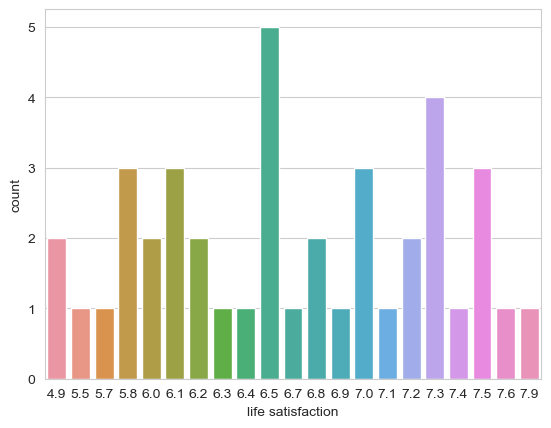

In [6]:
sns.set_style("whitegrid")
sns.countplot(x='life satisfaction',data=life)

In [7]:
#data cleaning
life.isnull().sum()

Country                               0
Dwellings without basic facilities    3
Rooms per person                      3
Housing expenditure                   4
air pollution                         0
water quality                         0
life satisfaction                     0
dtype: int64

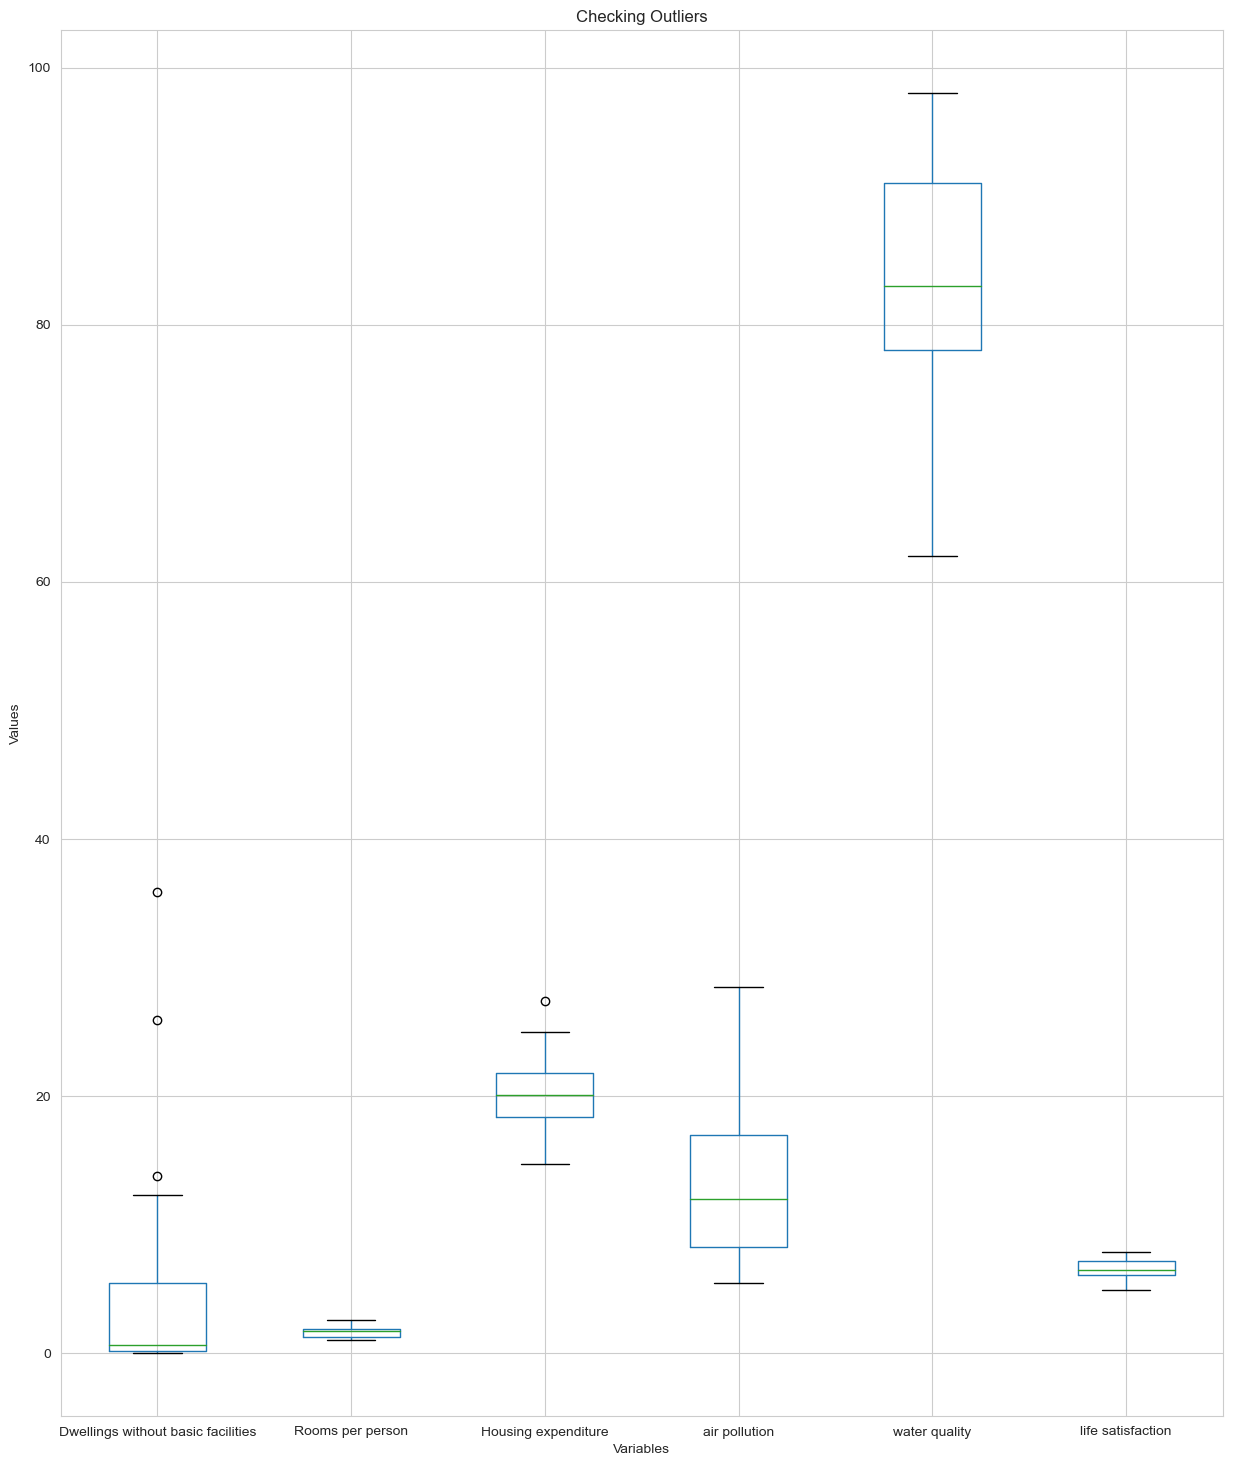

In [8]:
plt.figure(figsize=(15,18))
life.boxplot()
plt.title('Checking Outliers')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.show()

In [9]:
life['Dwellings without basic facilities'].fillna(life['Dwellings without basic facilities'].mean(),inplace=True)
life['Rooms per person'].fillna(life['Rooms per person'].mean(),inplace=True)
life['Housing expenditure'].fillna(life['Housing expenditure'].mean(),inplace=True)

C:\Users\geete\AppData\Local\Temp\ipykernel_16860\297478044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  life['Dwellings without basic facilities'].fillna(life['Dwellings without basic facilities'].mean(),inplace=True)
C:\Users\geete\AppData\Local\Temp\ipykernel_16860\297478044.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  life['Rooms per person'].fillna(life['Rooms per person'].mean(),inplace=True)
C:\Users\geete\AppData\Local\Temp\ipykernel_16860\297478044.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas

In [10]:
life.isnull().sum()

Country                               0
Dwellings without basic facilities    0
Rooms per person                      0
Housing expenditure                   0
air pollution                         0
water quality                         0
life satisfaction                     0
dtype: int64

In [11]:
#treat outliers
q75, q25 = np.percentile(life['Dwellings without basic facilities'], [75, 25])
iqr = q75 - q25
whisker = q75 + (iqr * 1.5)

median = life['Dwellings without basic facilities'].mean()

# Replace outliers with the median
life.loc[life['Dwellings without basic facilities'] < whisker, 'Dwellings without basic facilities'] = median

In [12]:
q75, q25 = np.percentile(life['Housing expenditure'], [75, 25])
iqr = q75 - q25
whisker = q75 + (iqr * 1.5)

median = life['Housing expenditure'].median()

# Replace outliers with the median
life.loc[life['Housing expenditure'] < whisker, 'Housing expenditure'] = median

In [13]:
#dropping Country since it is an identifier
life.drop(['Country'],axis=1,inplace=True)

C:\Users\geete\AppData\Local\Temp\ipykernel_16860\1316345426.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  life.drop(['Country'],axis=1,inplace=True)


In [14]:
def categorize_life_satisfaction(score):
    if score < 6.3:
        return "Unsatisfied"
    elif 6.3 <= score < 7.2:
        return "Moderate"
    else:
        return "Satisfied"

life['life satisfaction'] = life['life satisfaction'].apply(categorize_life_satisfaction)
life.head()

C:\Users\geete\AppData\Local\Temp\ipykernel_16860\3476282460.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  life['life satisfaction'] = life['life satisfaction'].apply(categorize_life_satisfaction)


,Dwellings without basic facilities,Rooms per person,Housing expenditure,air pollution,water quality,life satisfaction
0,4.294737,1.657895,20.345946,6.7,92,Moderate
1,4.294737,1.600000,20.345946,12.2,92,Satisfied
2,4.294737,2.100000,20.345946,12.8,79,Moderate
3,4.294737,2.600000,20.345946,7.1,90,Moderate
4,4.294737,1.900000,20.345946,23.4,62,Unsatisfied


In [15]:
#Creating dummy variables
mapx={'Unsatisfied':0,'Moderate':1,'Satisfied':2}
life['life satisfaction']=life['life satisfaction'].map(mapx)
life.head()

C:\Users\geete\AppData\Local\Temp\ipykernel_16860\306440493.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  life['life satisfaction']=life['life satisfaction'].map(mapx)


,Dwellings without basic facilities,Rooms per person,Housing expenditure,air pollution,water quality,life satisfaction
0,4.294737,1.657895,20.345946,6.7,92,1
1,4.294737,1.600000,20.345946,12.2,92,2
2,4.294737,2.100000,20.345946,12.8,79,1
3,4.294737,2.600000,20.345946,7.1,90,1
4,4.294737,1.900000,20.345946,23.4,62,0


# Before PCA

<AxesSubplot:xlabel='Dwellings without basic facilities', ylabel='Rooms per person'>

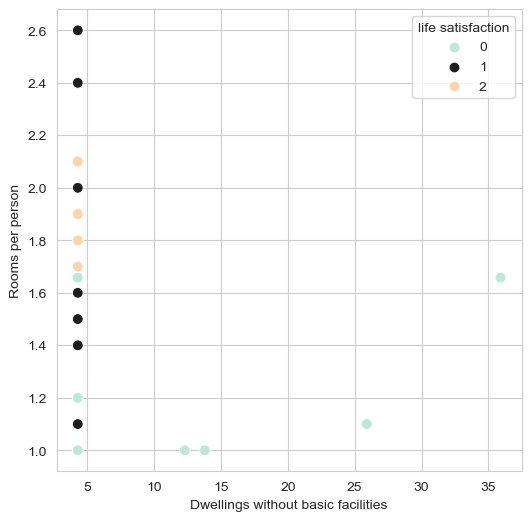

In [16]:
plt.figure(figsize = (6,6))
sns.scatterplot(data = life , x = 'Dwellings without basic facilities',y = 'Rooms per person' , hue = 'life satisfaction' , s = 60 , palette= 'icefire')

<AxesSubplot:xlabel='Dwellings without basic facilities', ylabel='Housing expenditure'>

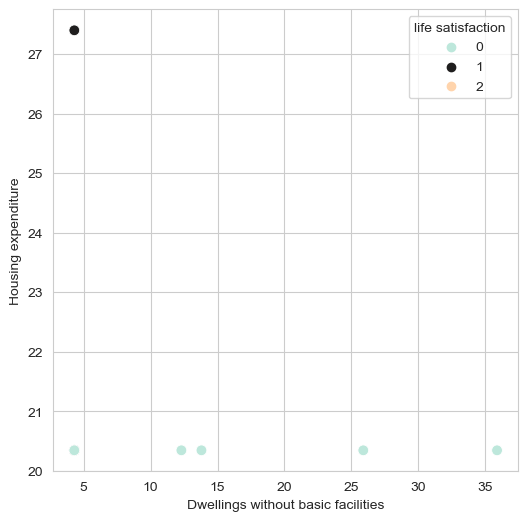

In [17]:
plt.figure(figsize = (6,6))
sns.scatterplot(data = life , x = 'Dwellings without basic facilities',y = 'Housing expenditure' , hue = 'life satisfaction' , s = 60 , palette= 'icefire')

<AxesSubplot:xlabel='Housing expenditure', ylabel='Rooms per person'>

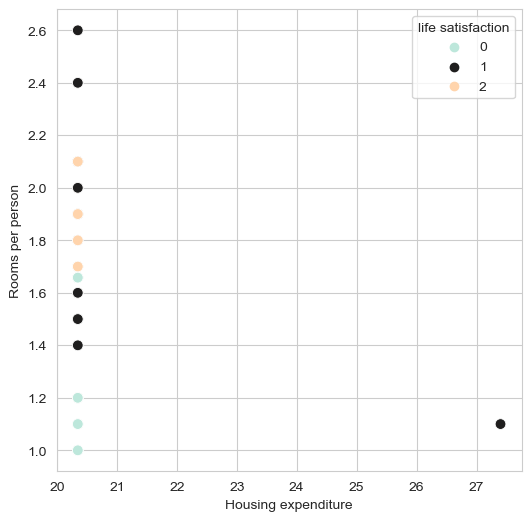

In [18]:
plt.figure(figsize = (6,6))
sns.scatterplot(data = life , x = 'Housing expenditure',y = 'Rooms per person' , hue = 'life satisfaction' , s = 60 , palette= 'icefire')

<AxesSubplot:xlabel='air pollution', ylabel='Housing expenditure'>

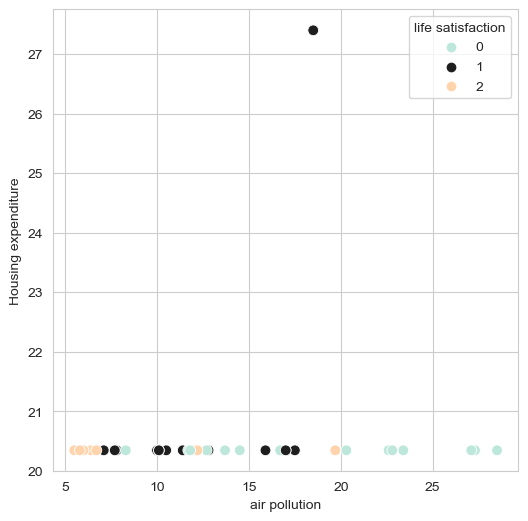

In [19]:
plt.figure(figsize = (6,6))
sns.scatterplot(data = life , x = 'air pollution',y = 'Housing expenditure' , hue = 'life satisfaction' , s = 60 , palette= 'icefire')

<AxesSubplot:xlabel='water quality', ylabel='Rooms per person'>

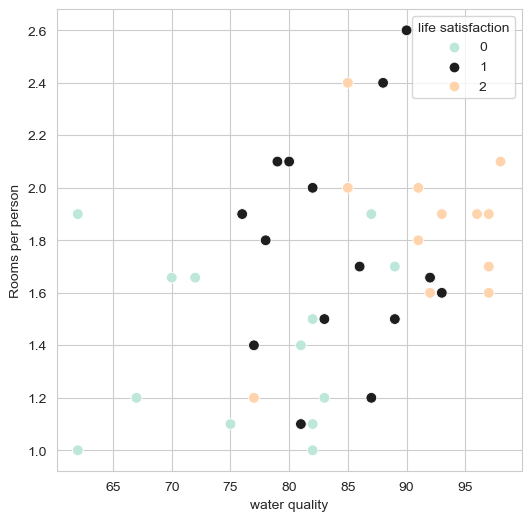

In [20]:
plt.figure(figsize = (6,6))
sns.scatterplot(data = life , x = 'water quality',y = 'Rooms per person' , hue = 'life satisfaction' , s = 60 , palette= 'icefire')

<AxesSubplot:xlabel='water quality', ylabel='Housing expenditure'>

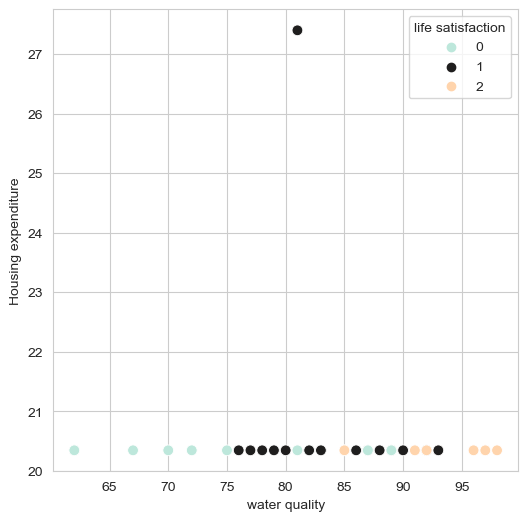

In [21]:
plt.figure(figsize = (6,6))
sns.scatterplot(data = life , x = 'water quality',y = 'Housing expenditure' , hue = 'life satisfaction' , s = 60 , palette= 'icefire')

<AxesSubplot:xlabel='water quality', ylabel='air pollution'>

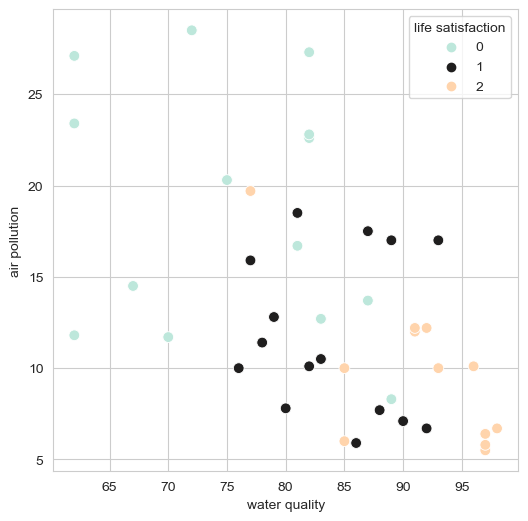

In [22]:
plt.figure(figsize = (6,6))
sns.scatterplot(data = life , x = 'water quality',y = 'air pollution' , hue = 'life satisfaction' , s = 60 , palette= 'icefire')

# PCA for Housing Dimension
1. Dwelling without basic facilities
2. Rooms per person
3. Housing expenditure

Making one variable for both the dimensions

In [23]:
X=life.drop(['life satisfaction','air pollution','water quality'],axis=1,inplace=False)
y=life['life satisfaction']

In [24]:
#Standardizing the data
mu = np.mean(X, axis=0)
sigma = np.std(X, axis=0)
X_scaled = (X - mu) / sigma

In [25]:
features = X_scaled.T
#Covariance Matrix
cov_matrix = np.cov(features)

In [26]:
cov_matrix

array([[ 1.025     , -0.24276566, -0.04624623],
       [-0.24276566,  1.025     , -0.22513909],
       [-0.04624623, -0.22513909,  1.025     ]])

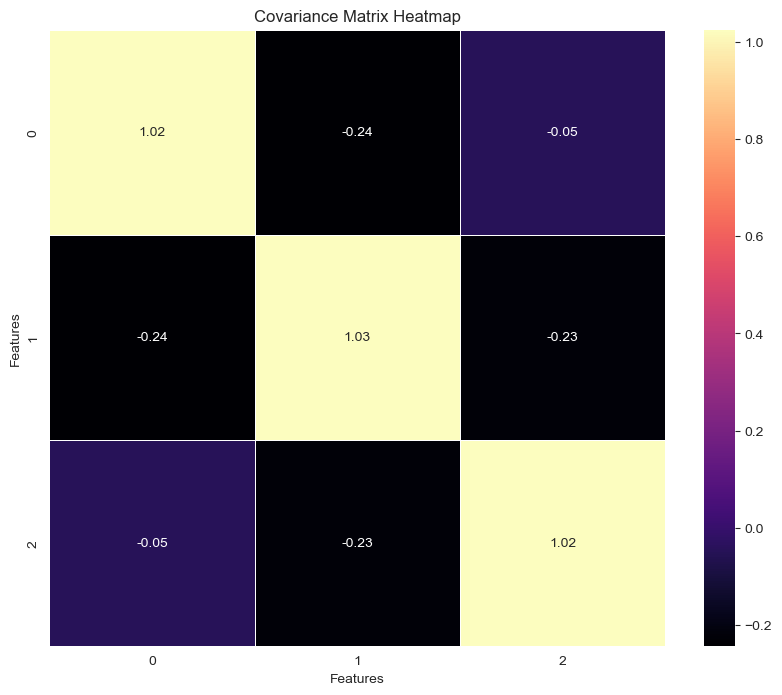

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, fmt='.2f', cmap='magma', square=True, linewidths=0.5)
plt.title('Covariance Matrix Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [28]:
#Eigen Decomposition
values, vectors = np.linalg.eig(cov_matrix)
print(vectors)

[[ 0.53186212  0.6788291   0.50627437]
 [ 0.68207215  0.01093217 -0.73120316]
 [ 0.50189667 -0.73421491  0.45719602]]


In [29]:
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))
 
print(np.sum(explained_variances), '\n', explained_variances)

0.9999999999999999 
 [0.2178962866643101, 0.3483284084395127, 0.4337753048961771]


In [30]:
# eigen vectors are actually the principal components and eigenvalues are the amount of variance carried in each

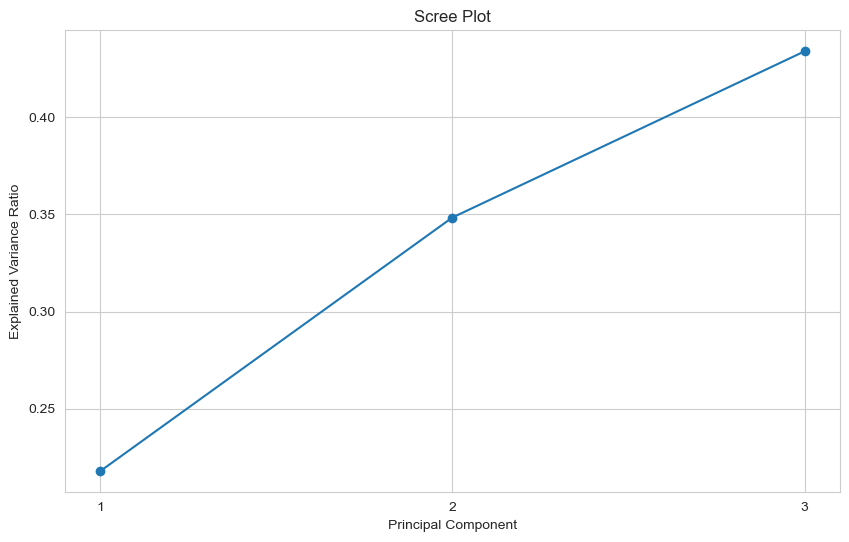

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variances) + 1), explained_variances, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variances) + 1))
plt.grid(True)
plt.show()

In [32]:
#Principal Component Selection
sorted_index = np.argsort(values)[::-1]
 
sorted_eigenvalue = values[sorted_index]

In [33]:
sorted_eigenvectors = vectors[:,sorted_index]
print(sorted_eigenvectors)

[[ 0.50627437  0.6788291   0.53186212]
 [-0.73120316  0.01093217  0.68207215]
 [ 0.45719602 -0.73421491  0.50189667]]


In [34]:
#feature vector
n_components = 1 
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

In [35]:
print('FEATURE VECTOR')
eigenvector_subset

FEATURE VECTOR


array([[ 0.50627437],
       [-0.73120316],
       [ 0.45719602]])

In [36]:
#Data projection
X_reduced = np.dot(eigenvector_subset.transpose(),X_scaled.transpose()).transpose()

In [37]:
pca_df = pd.DataFrame(X_reduced , columns = ['PC1'])

In [38]:
pca_df = pd.concat([pca_df , pd.DataFrame(y, columns=['life satisfaction'])], axis=1)

In [39]:
pca_df.head()

,PC1,life satisfaction
0,-0.216756,1
1,-0.111346,2
2,-1.021705,1
3,-1.932065,1
4,-0.657561,0


# PCA for Environment Dimension

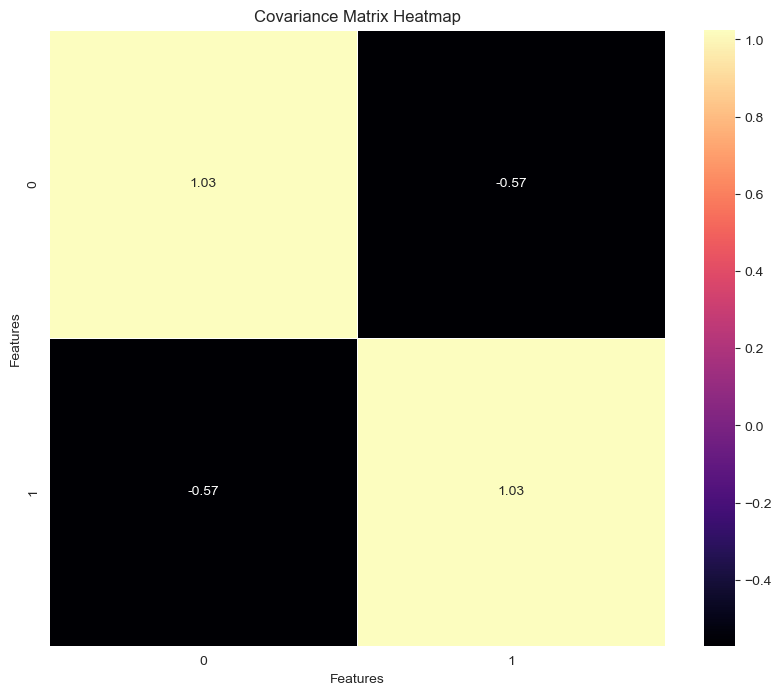

In [40]:
X=life[['air pollution','water quality']]
y=life['life satisfaction']
#Standardizing the data
mu = np.mean(X, axis=0)
sigma = np.std(X, axis=0)
X_scaled = (X - mu) / sigma
features = X_scaled.T
# Covariance matrix
cov_matrix = np.cov(features)
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, fmt='.2f', cmap='magma', square=True, linewidths=0.5)
plt.title('Covariance Matrix Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [41]:
#Eigen Decomposition
values, vectors = np.linalg.eig(cov_matrix)
print(vectors)
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))
 
print(np.sum(explained_variances), '\n', explained_variances)

[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
1.0 
 [0.7784683283629403, 0.22153167163705978]


Above eigenvectors are very similar since they are orthogonal.

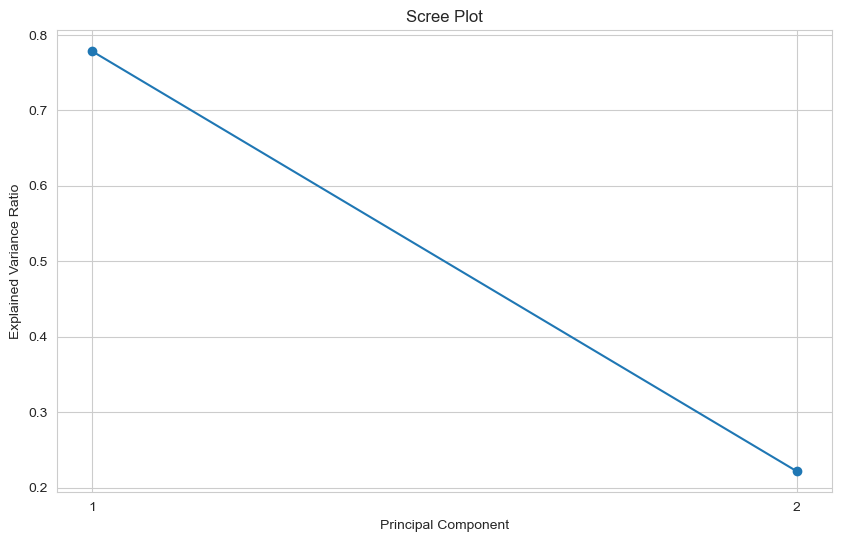

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variances) + 1), explained_variances, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variances) + 1))
plt.grid(True)
plt.show()

In [43]:
#Principal Component Selection
sorted_index = np.argsort(values)[::-1]
 
sorted_eigenvalue = values[sorted_index]
 
sorted_eigenvectors = vectors[:,sorted_index]
print(sorted_eigenvectors)

[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


In [44]:
n_components = 1 
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

In [45]:
# Data Projection
X_reduced = np.dot(eigenvector_subset.transpose(),X_scaled.transpose()).transpose()
pca = pd.DataFrame(X_reduced , columns = ['PC2'])
pca = pd.concat([pca , pd.DataFrame(y, columns=['life satisfaction'])], axis=1)
pca.head()

,PC2,life satisfaction
0,-1.401951,1
1,-0.786171,2
2,0.238505,1
3,-1.209859,1
4,2.677396,0


In [46]:
df_merged = pd.merge(pca_df, pca, on='life satisfaction', how='inner')
df_merged

,PC1,life satisfaction,PC2
0,-0.216756,1,-1.401951
1,-0.216756,1,0.238505
2,-0.216756,1,-1.209859
3,-0.216756,1,0.175486
4,-0.216756,1,-0.027802
...,...,...,...
560,2.430299,0,-1.001854
561,2.430299,0,3.091648
562,2.430299,0,0.778234
563,2.430299,0,1.378660


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

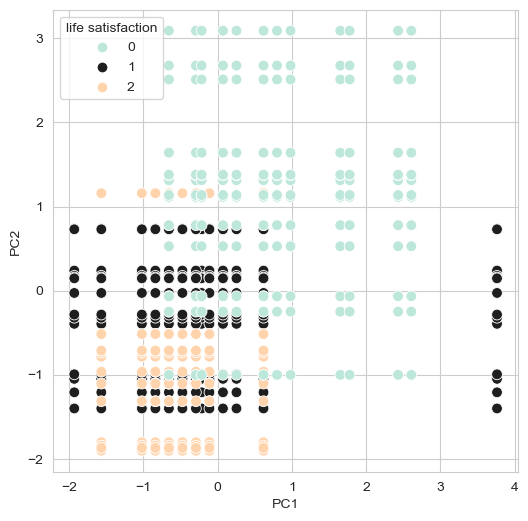

In [47]:
plt.figure(figsize = (6,6))
sns.scatterplot(data = df_merged , x = 'PC1',y='PC2' , hue = 'life satisfaction' , s = 60 , palette= 'icefire')

# Additional Exploration

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [49]:
# Building the model with old data

In [50]:
X=life.drop(['life satisfaction'],axis=1)
Y=life['life satisfaction']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=100)
log = LogisticRegression()
log.fit(X_train, Y_train)
predictions = log.predict(X_test)
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.33      0.20      0.25         5
           2       0.50      1.00      0.67         2

    accuracy                           0.54        13
   macro avg       0.50      0.62      0.53        13
weighted avg       0.51      0.54      0.51        13



C:\Users\geete\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
testscore = log.score(X_test, Y_test)
print("Testing Score (Accuracy):", testscore)

Testing Score (Accuracy): 0.5384615384615384


In [52]:
X=df_merged.drop(['life satisfaction'],axis=1)
Y=df_merged['life satisfaction']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=100)

In [53]:
logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)

LogisticRegression()

In [54]:
predictions = logmodel.predict(X_test)
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        64
           1       0.69      0.77      0.73        69
           2       0.68      0.57      0.62        37

    accuracy                           0.75       170
   macro avg       0.74      0.72      0.73       170
weighted avg       0.75      0.75      0.75       170



In [55]:
test_score = logmodel.score(X_test, Y_test)
print("Testing Score (Accuracy):", test_score)

Testing Score (Accuracy): 0.7470588235294118


# After making Principal Components for both the dimensions, the accuracy of the model has increased :)